<Figure size 1200x600 with 0 Axes>

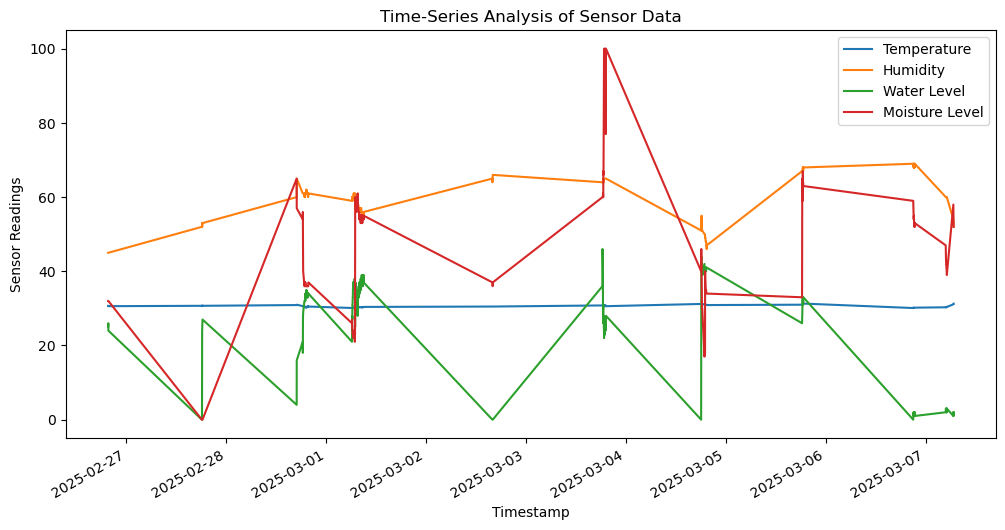

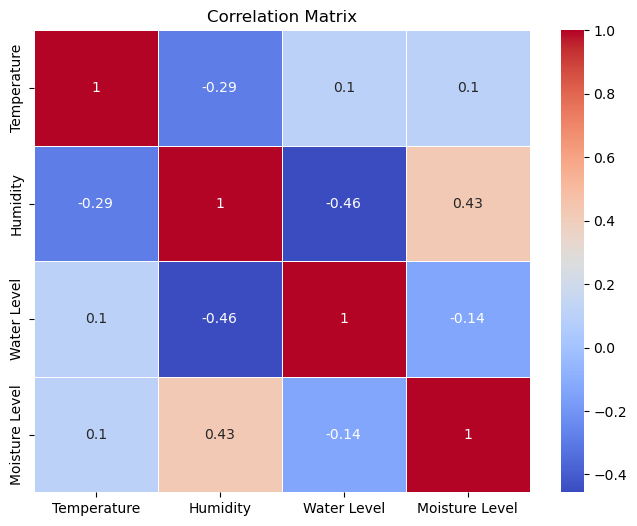

Anomalies detected:
Empty DataFrame
Columns: [Temperature, Humidity, Water Level, Moisture Level]
Index: []
Summary Statistics:
       Temperature    Humidity  Water Level  Moisture Level
count   371.000000  371.000000   372.000000      372.000000
mean     30.506739   58.838275    29.040323       46.424731
std       0.343878    5.567836    12.486154       19.888293
min      30.100000   45.000000     0.000000        0.000000
25%      30.300000   56.000000    26.000000       36.000000
50%      30.400000   60.000000    34.000000       45.500000
75%      30.800000   61.000000    37.000000       56.000000
max      31.300000   69.000000    46.000000      100.000000


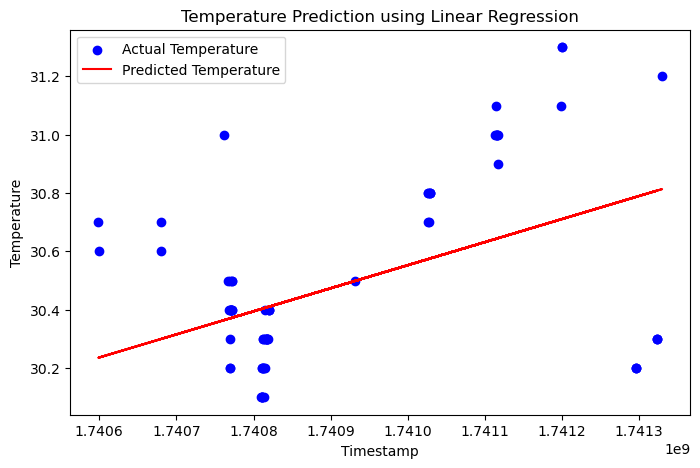

<Figure size 1000x500 with 0 Axes>

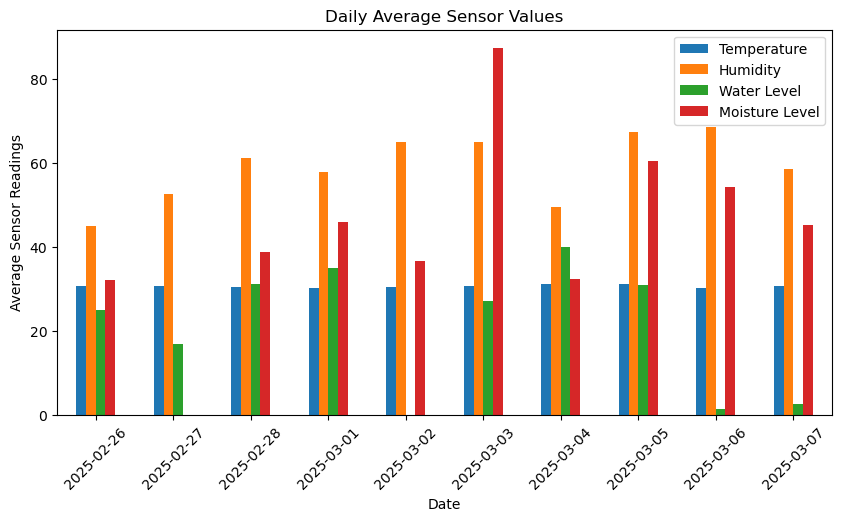

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore

# Load the dataset
file_path = "sensor_data2.xlsx"  # Update if running locally
df = pd.read_excel(file_path)

# Convert timestamp to datetime format and set as index
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

# Time-Series Analysis
plt.figure(figsize=(12, 6))
df.plot(title="Time-Series Analysis of Sensor Data", figsize=(12, 6))
plt.xlabel("Timestamp")
plt.ylabel("Sensor Readings")
plt.legend()
plt.show()

# Correlation Analysis
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Anomaly Detection using Z-Score
df_zscore = df.apply(zscore)  # Compute z-score for each column
anomalies = df[(df_zscore > 3) | (df_zscore < -3)].dropna(how='all')

print("Anomalies detected:")
print(anomalies)

# Statistical Analysis
print("Summary Statistics:")
print(df.describe())

# Prediction & Forecasting (Using Linear Regression for Temperature Prediction)
df['Timestamp_unix'] = df.index.astype(np.int64) // 10**9  # Convert datetime to Unix timestamp (seconds)
x_train, x_test, y_train, y_test = train_test_split(df['Timestamp_unix'].values.reshape(-1, 1), 
                                                    df['Temperature'], test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Plot the predicted vs actual values
plt.figure(figsize=(8, 5))
plt.scatter(x_test, y_test, color='blue', label='Actual Temperature')
plt.plot(x_test, y_pred, color='red', label='Predicted Temperature')
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.legend()
plt.title("Temperature Prediction using Linear Regression")
plt.show()

# Convert Timestamp index to Date for daily aggregation
df['Date'] = df.index.date  # Extract only date part

# Group by Date and calculate the mean, excluding Timestamp_unix
daily_avg = df.groupby('Date').mean().drop(columns=['Timestamp_unix'], errors='ignore')

# Plot daily averages
plt.figure(figsize=(10, 5))
daily_avg.plot(kind='bar', figsize=(10, 5))
plt.title("Daily Average Sensor Values")
plt.xlabel("Date")
plt.ylabel("Average Sensor Readings")
plt.xticks(rotation=45)
plt.legend()
plt.show()

